In [1]:
from dea_tools.dask import create_local_dask_cluster

client = create_local_dask_cluster(return_client=True)

distributed.diskutils - INFO - Found stale lock file and directory '/home/jovyan/Robbi/dea-notebooks/Testing/dask-worker-space/worker-4f7_16kl', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,Workers: 1
Total threads: 15,Total memory: 117.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38501,Workers: 1
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/8787/status,Total threads: 15
Started: Just now,Total memory: 117.21 GiB
Comm: tcp://127.0.0.1:45055,Total threads: 15
Dashboard: /user/robbi.bishoptaylor@ga.gov.au/proxy/37877/status,Memory: 117.21 GiB
Nanny: tcp://127.0.0.1:37043,


In [7]:
import datacube

dc = datacube.Datacube()

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(135.35156, 135.92010), 
    y=(-14.57960, -15.20999), 
    time=("2015", "2022")
)

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(144.41254, 144.87328), 
    y=(-38.20581, -38.42455), 
    time=("2015", "2022")
)

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(147.48871, 147.65625), 
    y=(-42.80397, -42.89810), 
    time=("2017", "2022")
)

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(147.58244, 147.88834), 
    y=(-19.67557, -19.89621), 
    time=("2017", "2022")
)

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(147.02591, 147.68234), 
    y=(-19.37982, -19.81968), 
    time=("2017", "2022")
)

query_params = dict(
    product="ga_s2am_ard_3", 
    x=(149.06147, 149.19125), 
    y=(-35.22, -35.36), 
    time=("2017", "2022")
)

query_params = dict(
    product=["ga_s2am_ard_3", "ga_s2bm_ard_3"],
    x=(152.03698368, 152.10103937), 
    y=(-23.47732272, -23.51825924), 
    time=("2015", "2022")
)


load_params = dict(
    dask_chunks={'x': 2048, 'y': 2048},
    output_crs=dc.find_datasets(**query_params)[0].crs,
    resolution=(-10, 10),
    group_by="solar_day",
    measurements=["s2cloudless_prob", "s2cloudless_mask", "nbart_red", "nbart_green", "nbart_blue"],
)

ds = dc.load(**query_params, **load_params)

In [ ]:
# ds.s2cloudless_prob.sel(time='2022').plot.imshow(col='time', col_wrap=6, size=5, cmap='magma')

In [ ]:
# thresh = ds.s2cloudless_prob.mean(dim='time')
# thresh.plot(size=15)

In [ ]:
# ds.s2cloudless_prob.plot()

In [ ]:
# ds.s2cloudless_prob.median()

distributed.nanny - WARNING - Restarting worker


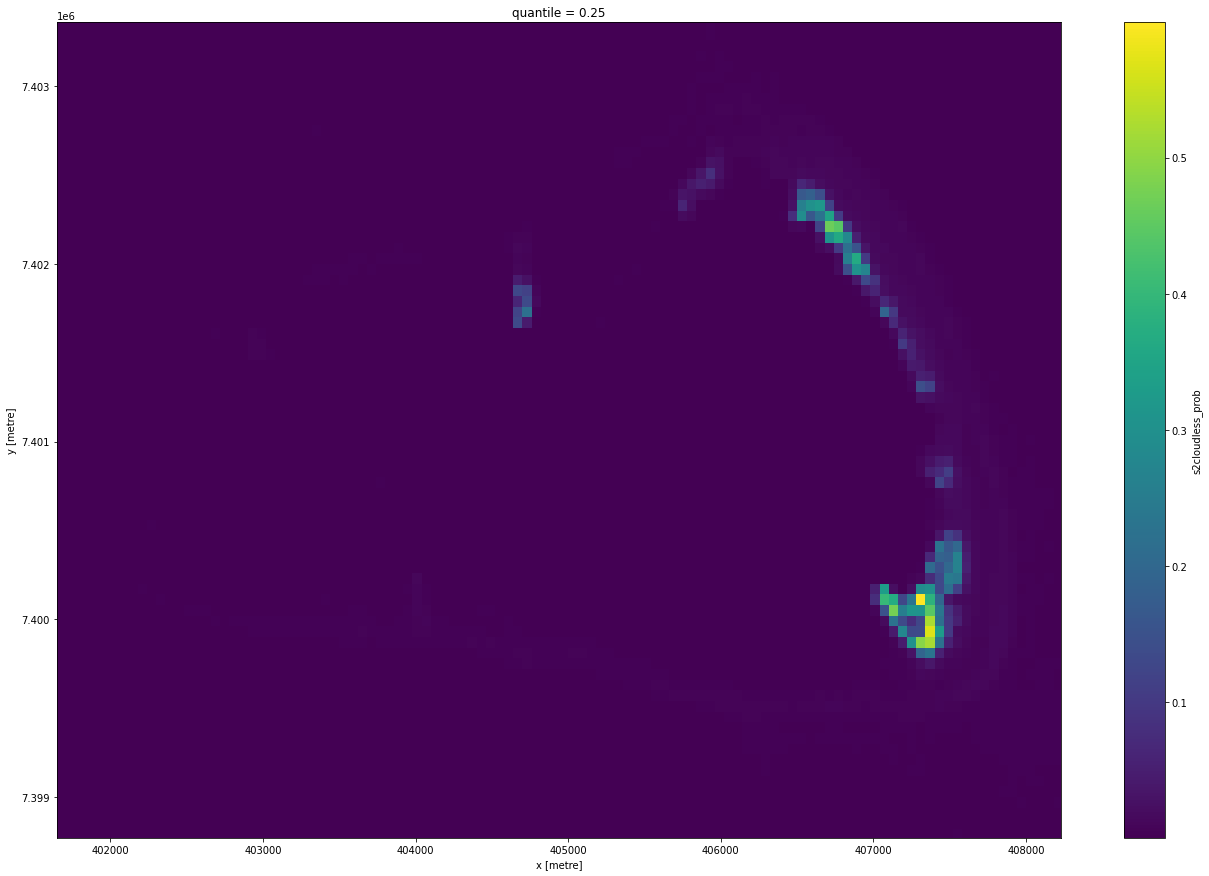

In [9]:
thresh = ds.s2cloudless_prob.chunk(dict(time=-1)).quantile(q=0.25, dim='time')
thresh.load()
thresh.plot(size=15)

In [ ]:
# Out[87].plot()

In [ ]:
# thresh = ds.s2cloudless_prob.median(dim='time')
# thresh.plot(size=15)

In [10]:
ds["s2cloudless_prob"].load()

<xarray.DataArray 's2cloudless_prob' (time: 387, y: 459, x: 658)>
array([[[0.00688282, 0.00688282, 0.00688282, ..., 0.02317486,
         0.02317486, 0.02317486],
        [0.00688282, 0.00688282, 0.00688282, ..., 0.02317486,
         0.02317486, 0.02317486],
        [0.00688282, 0.00688282, 0.00688282, ..., 0.02317486,
         0.02317486, 0.02317486],
        ...,
        [0.00644637, 0.00644637, 0.00644637, ..., 0.00470118,
         0.00470118, 0.00470118],
        [0.00644637, 0.00644637, 0.00644637, ..., 0.00470118,
         0.00470118, 0.00470118],
        [0.00644637, 0.00644637, 0.00644637, ..., 0.00470118,
         0.00470118, 0.00470118]],

       [[0.45825358, 0.45825358, 0.45825358, ..., 0.95930647,
         0.95930647, 0.95930647],
        [0.45825358, 0.45825358, 0.45825358, ..., 0.95930647,
         0.95930647, 0.95930647],
        [0.45825358, 0.45825358, 0.45825358, ..., 0.95930647,
         0.95930647, 0.95930647],
...
        [0.09887316, 0.09887316, 0.09887316, ..., 0.08519434,
         0.08519434, 0.08519434],
        [0.09887316, 0.09887316, 0.09887316, ..., 0.08519434,
         0.08519434, 0.08519434],
        [0.09887316, 0.09887316, 0.09887316, ..., 0.08519434,
         0.08519434, 0.08519434]],

       [[0.07559712, 0.07559712, 0.07559712, ..., 0.99992102,
         0.99992102, 0.99992102],
        [0.07559712, 0.07559712, 0.07559712, ..., 0.99992102,
         0.99992102, 0.99992102],
        [0.07559712, 0.07559712, 0.07559712, ..., 0.99992102,
         0.99992102, 0.99992102],
        ...,
        [0.11708063, 0.11708063, 0.11708063, ..., 0.73156484,
         0.73156484, 0.73156484],
        [0.11708063, 0.11708063, 0.11708063, ..., 0.73156484,
         0.73156484, 0.73156484],
        [0.11708063, 0.11708063, 0.11708063, ..., 0.73156484,
         0.73156484, 0.73156484]]])
Coordinates:
  * time         (time) datetime64[ns] 2016-12-16T00:02:13.456000 ... 2022-08...
  * y            (y) float64 7.403e+06 7.403e+06 ... 7.399e+06 7.399e+06
  * x            (x) float64 4.017e+05 4.017e+05 ... 4.082e+05 4.082e+05
    spatial_ref  int32 32756
Attributes:
    units:         1
    nodata:        nan
    crs:           EPSG:32756
    grid_mapping:  spatial_ref

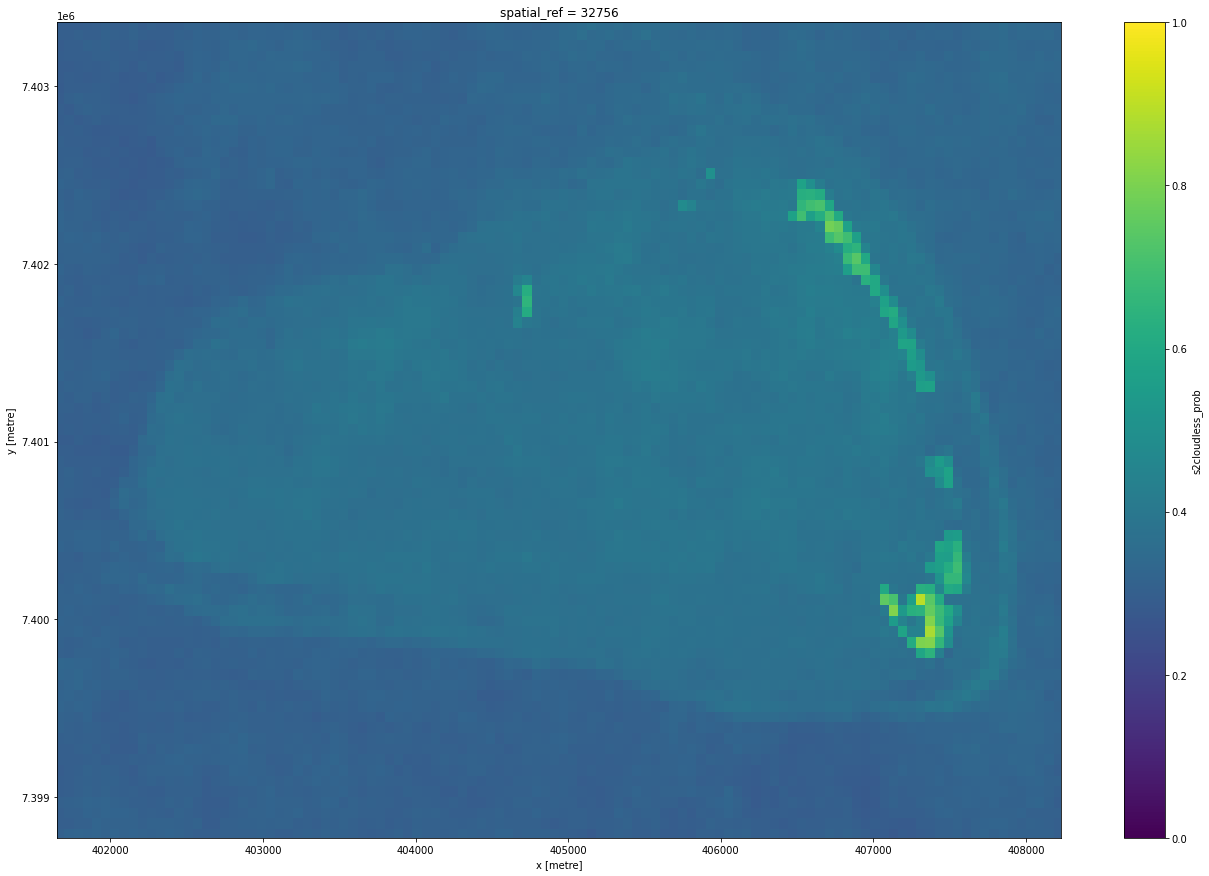

In [11]:
mean_no_thresh = (ds.s2cloudless_prob > 0.4).where(~ds.s2cloudless_prob.isnull()).mean(dim='time')
vmin, vmax = 0.0, 1.0
mean_no_thresh.plot(size=15, vmin=vmin, vmax=vmax)

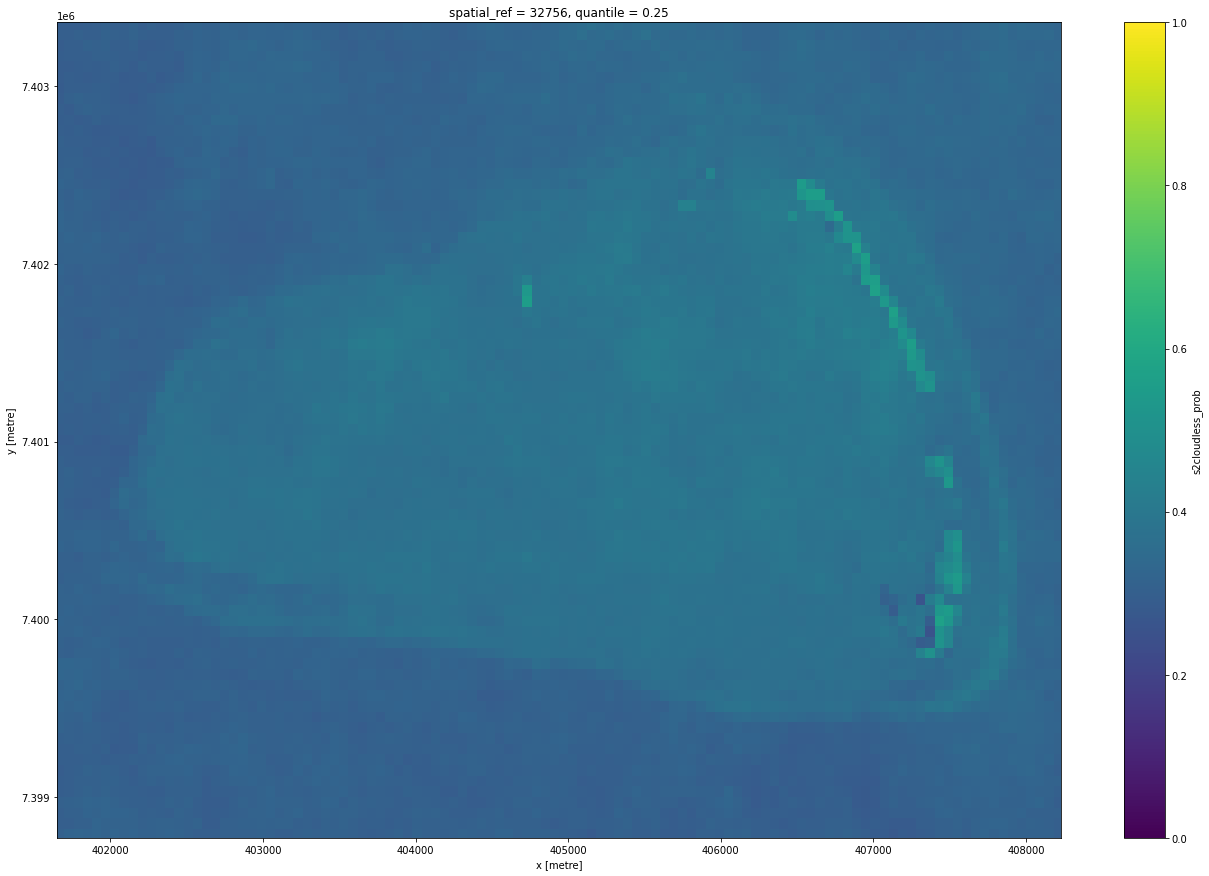

In [12]:
mean_thresh = (ds.s2cloudless_prob > (0.4 + thresh).clip(0, 0.95)).where(~ds.s2cloudless_prob.isnull()).mean(dim='time')
mean_thresh.plot(size=15, vmin=vmin, vmax=vmax)

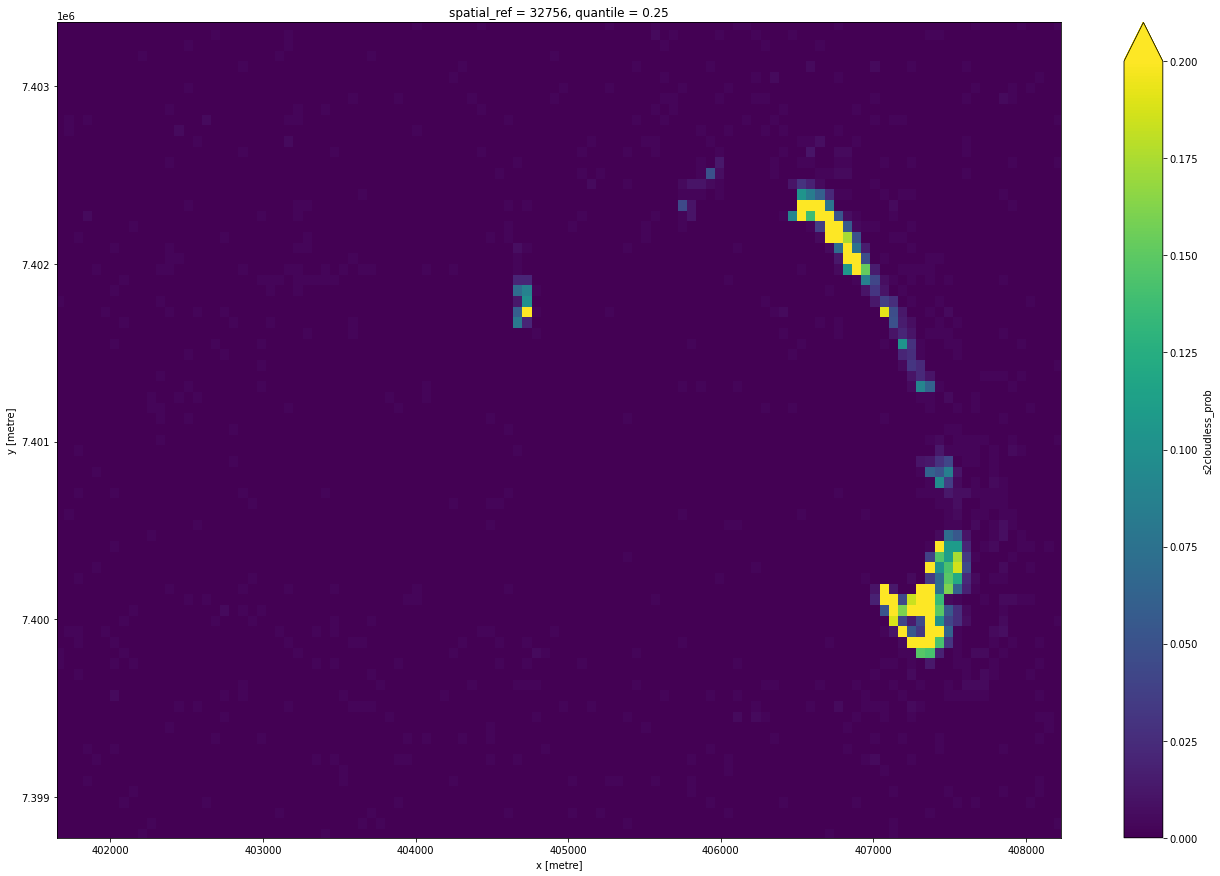

In [13]:
(mean_no_thresh - mean_thresh).plot(size=15, vmin=0, vmax=0.2)

In [ ]:
(mean_no_thresh - mean_thresh).median()

In [ ]:
(0.4 + 1 * thresh).clip(0, 0.95).plot(vmin=0, vmax=1.0, size=15)

In [ ]:
(thresh * 0.7).plot(size=20)

In [ ]:
(ds.s2cloudless_prob < (0.4 + thresh * 0.1 )).sel(time='2022').plot.imshow(col='time', col_wrap=6, size=5, cmap='magma')

In [ ]:
0.99 / 0.9

In [ ]:
0.5 / 0.9

In [16]:
cloudmask = (ds.s2cloudless_prob > (0.4 + thresh).clip(0, 0.95))

In [23]:
ds_cloudmasked = ds[['nbart_red', 'nbart_green', 'nbart_blue']].where(~cloudmask).compute()   #.isel(time=50).to_array().plot.imshow(robust=True)

In [27]:
from dea_tools.plotting import xr_animation

In [101]:
ds_cloudmasked = ds[['nbart_red', 'nbart_green', 'nbart_blue']].sel(time=cloudmask.mean(dim=['x', 'y']) < 0.20).compute()

In [107]:
ds_rolling = ds_cloudmasked.rolling(center=True, time=15, min_periods=1).median()

In [97]:
ds_rolling = ds_cloudmasked

Exporting animation to onetreeisland_s2_smoothed.mp4


  0%|          | 0/204 (0.0 seconds remaining at ? frames/s)

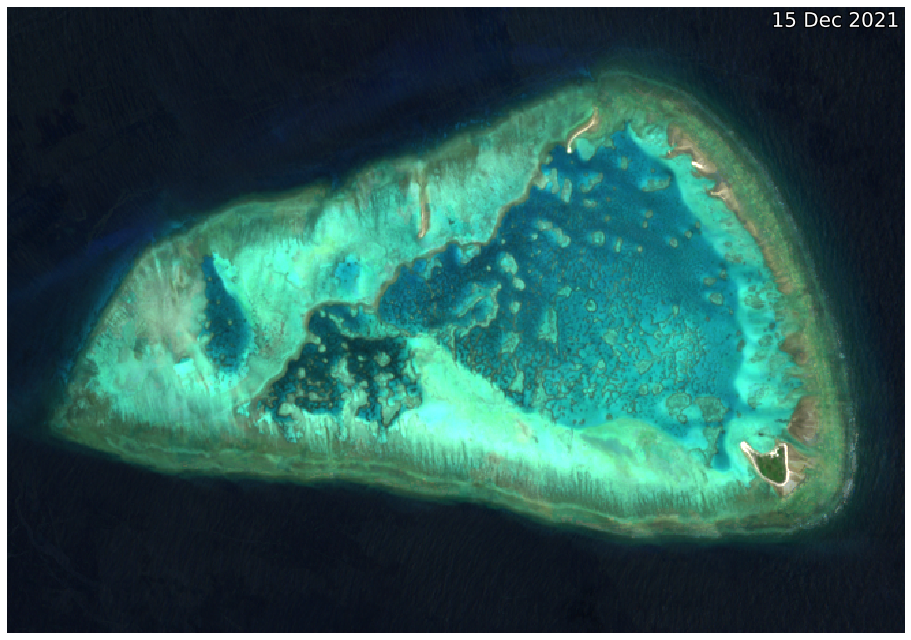

In [108]:
xr_animation(ds_rolling.isel(time=slice(3, -3)), bands=['nbart_red', 'nbart_green', 'nbart_blue'], interval=50, width_pixels=900, percentile_stretch=(0.03, 0.99), output_path='onetreeisland_s2_smoothed.mp4')

Exporting animation to animation.mp4


  0%|          | 0/352 (0.0 seconds remaining at ? frames/s)

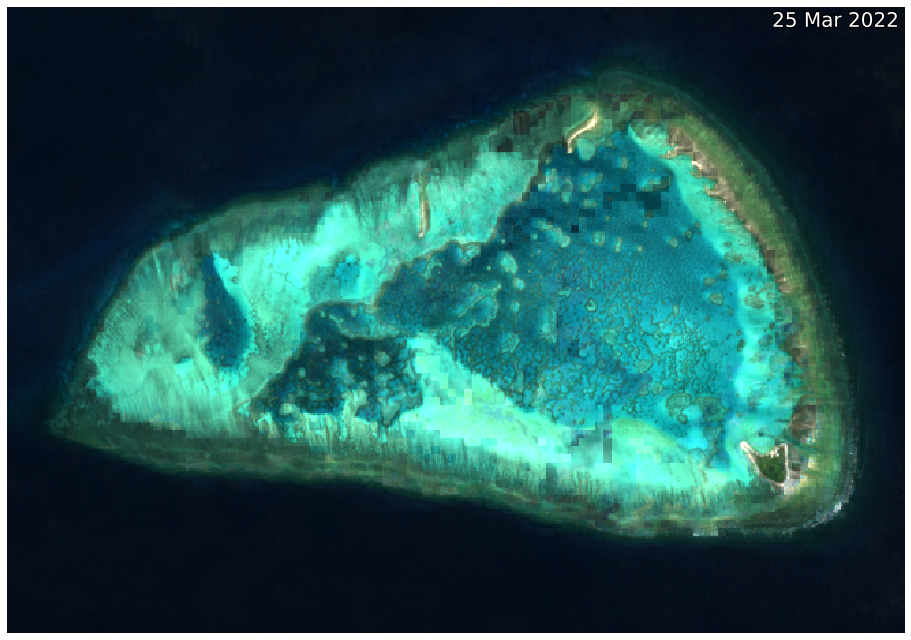

In [60]:
xr_animation(ds_rolling.isel(time=slice(5, -33)), bands=['nbart_red', 'nbart_green', 'nbart_blue'], interval=30, width_pixels=900, percentile_stretch=(0.03, 0.99))

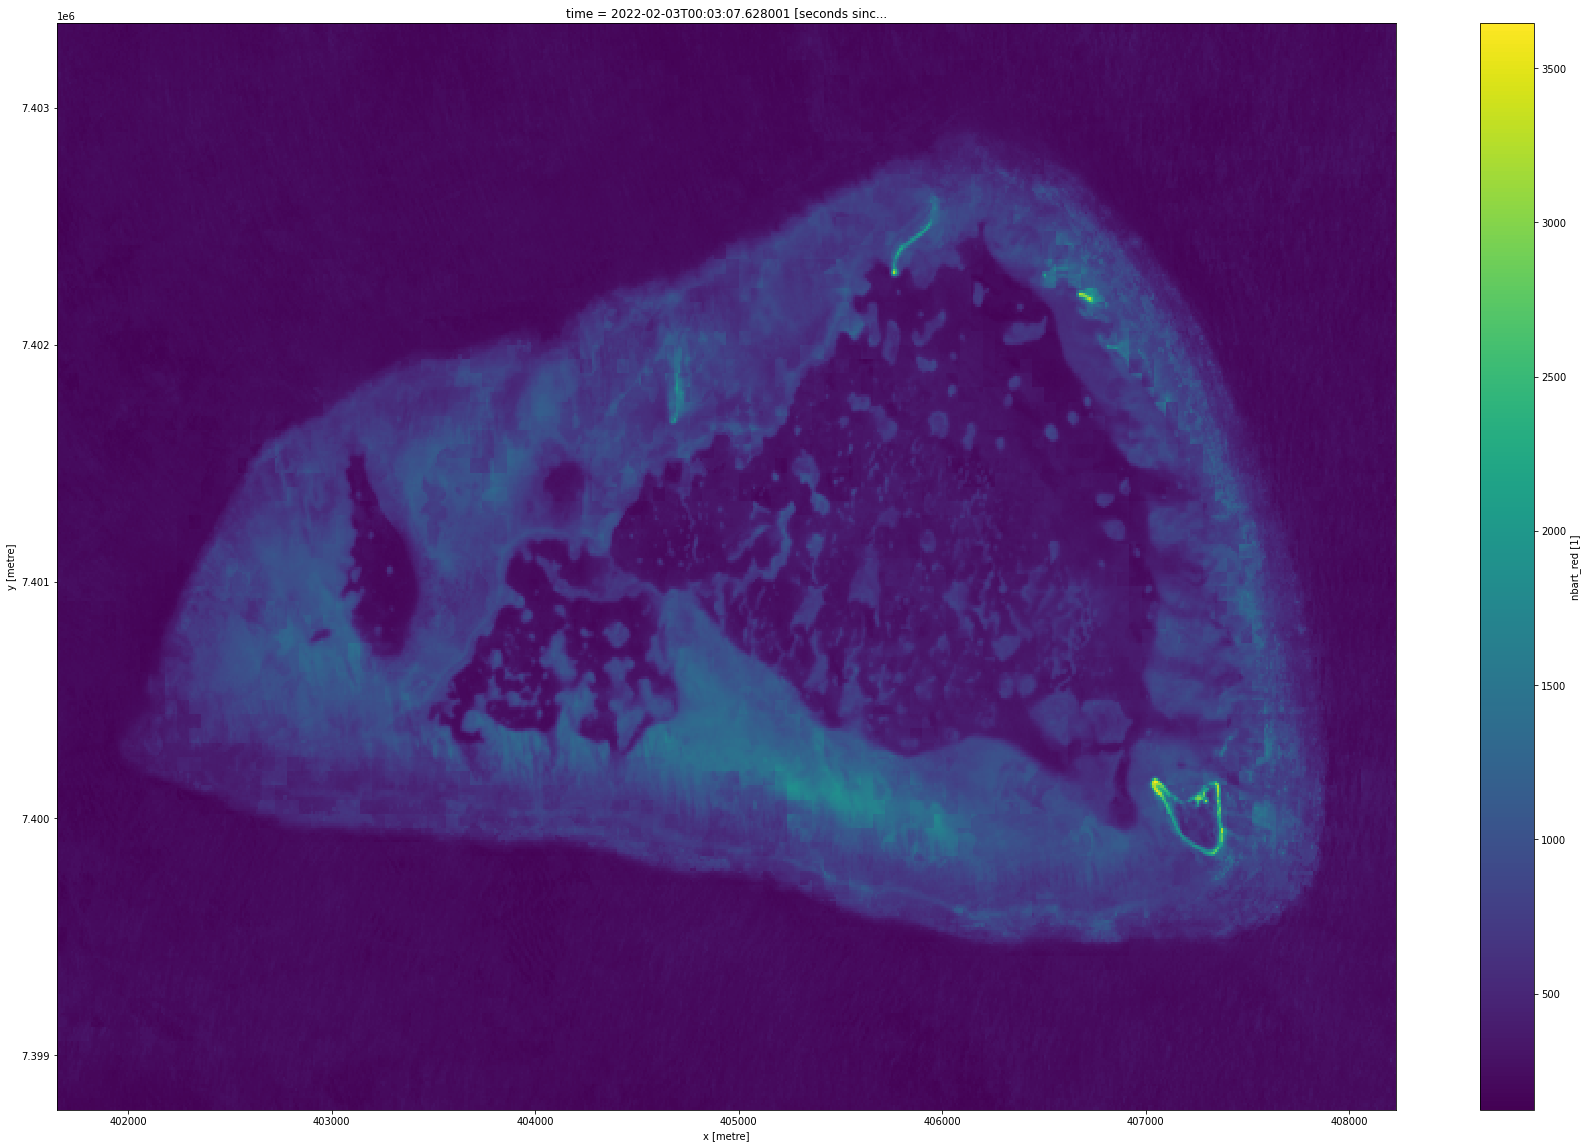

In [75]:
ds_rolling.isel(time=slice(5, -40)).isel(time=-1).nbart_red.plot(size=20)

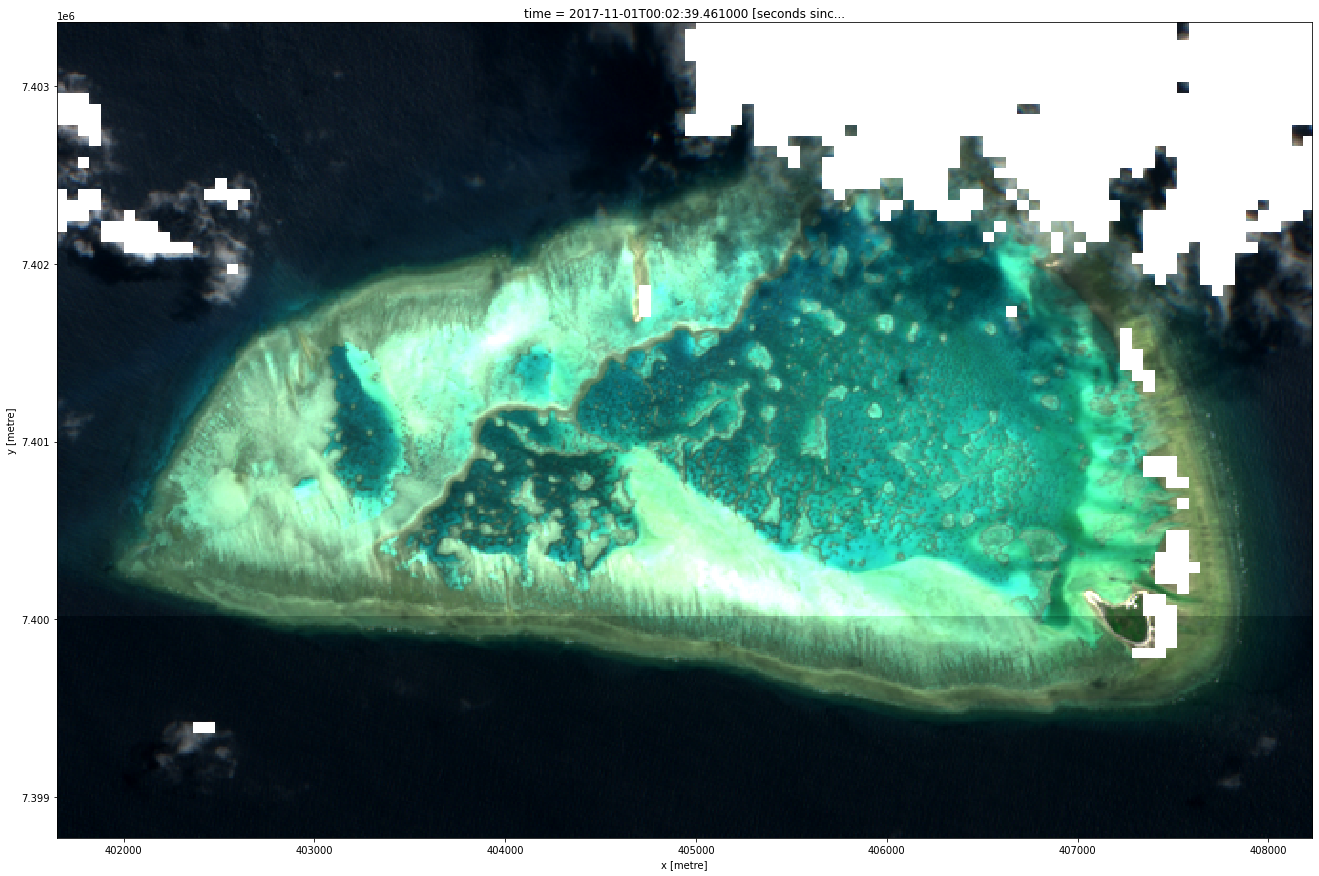

In [71]:
ds_cloudmasked.isel(time=42).to_array().plot.imshow(robust=True, size=15)